# 아이스크림 매장 매출 분석
- 데이터셋 : "달콤아이스크림" 매장의 2021년 2월부터 2022년 7월까지 약 6개월간의 키오스크 기록 데이터
- 약 50만 건
- 데이터 출처 : 본인

# columns description
- menu_list :
- price_increase :
- sales_creditcard :
- sales_hourly :
- sales_monthly :
- salse_dayoftheweek:
- sales_bymenu:


In [229]:
# 라이브러리 임포트

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

## 각 파일 확인

In [230]:
# 데이터 불러오기

icecream = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\icecream_2021-02-15 ~ 2022-07-05.csv')

C:\Users\09048\AppData\Local\Temp\ipykernel_13788\813376508.py:3: DtypeWarning: Columns (1,5,6,7,12,13,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  icecream = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\icecream_2021-02-15 ~ 2022-07-05.csv')


In [231]:
icecream.head()

,Source.Name,신용카드승인내역_주문내역,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
0,신용카드승인내역_주문내역_20230215184531.xlsx,번호,영업일자,간편결제구분,카드번호,승인번호,승인금액,할부,승인일자,승인시간,매입사,처리,기기번호,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,신용카드승인내역_주문내역_20230215184531.xlsx,1,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000867,빼빼로바,600.0,1.0
2,신용카드승인내역_주문내역_20230215184531.xlsx,2,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000463,초코쿠키바,400.0,1.0
3,신용카드승인내역_주문내역_20230215184531.xlsx,3,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000705,가나 아이스바,600.0,2.0
4,신용카드승인내역_주문내역_20230215184531.xlsx,4,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000531,체리마루바,400.0,1.0


In [232]:
menu_list = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\menu_list.csv')
menu_list

,분류,메뉴코드,바코드번호,관리메뉴명,메뉴명_한국어,메뉴명_영어,메뉴명_일본어,메뉴명_중국어,메뉴설명_한국어,메뉴설명_영어,...,판매갯수제한,판매여부,성인인증여부,과세여부,표시시작일자,표시종료일자,판매불가요일,연동코드,매입처,야간가격
0,상품,B0000003,8801104123181,비비빅,비비빅,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
1,상품,B0000004,8801104123174,메로나,메로나,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
2,상품,B0000005,8801019508356,누가바,누가바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
3,상품,B0000006,8801019508431,쌍쌍바,쌍쌍바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
4,상품,B0000007,8801019508363,바밤바,바밤바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,상품,B0001150,8809713221557,쌍쌍바 바닐라,쌍쌍바 바닐라,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20220504,99991231,1111111,NaN,NaN,NaN
1132,롯데과자,B0001151,8801062880096,롤리팝 아이스,롤리팝 아이스,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20220527,99991231,1111111,NaN,NaN,NaN
1133,상품,B0001152,8801062872893,설레임 쿠키앤크림,설레임 쿠키앤크림,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20220531,99991231,1111111,NaN,NaN,NaN
1134,젤리,B0001153,9648260645,스위트건,스위트건,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20220615,99991231,1111111,NaN,NaN,NaN


In [233]:
menu_list = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\menu_list.csv')
menu_list

,분류,메뉴코드,바코드번호,관리메뉴명,메뉴명_한국어,메뉴명_영어,메뉴명_일본어,메뉴명_중국어,메뉴설명_한국어,메뉴설명_영어,...,판매갯수제한,판매여부,성인인증여부,과세여부,표시시작일자,표시종료일자,판매불가요일,연동코드,매입처,야간가격
0,상품,B0000003,8801104123181,비비빅,비비빅,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
1,상품,B0000004,8801104123174,메로나,메로나,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
2,상품,B0000005,8801019508356,누가바,누가바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
3,상품,B0000006,8801019508431,쌍쌍바,쌍쌍바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
4,상품,B0000007,8801019508363,바밤바,바밤바,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20190101,99991231,1111111,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,상품,B0001150,8809713221557,쌍쌍바 바닐라,쌍쌍바 바닐라,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20220504,99991231,1111111,NaN,NaN,NaN
1132,롯데과자,B0001151,8801062880096,롤리팝 아이스,롤리팝 아이스,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20220527,99991231,1111111,NaN,NaN,NaN
1133,상품,B0001152,8801062872893,설레임 쿠키앤크림,설레임 쿠키앤크림,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20220531,99991231,1111111,NaN,NaN,NaN
1134,젤리,B0001153,9648260645,스위트건,스위트건,NaN,NaN,NaN,NaN,NaN,...,0,Y,N,Y,20220615,99991231,1111111,NaN,NaN,NaN


In [234]:
sales_bymenu = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\sales_bymenu.csv')
sales_bymenu

,메뉴별 매출현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,메뉴코드,바코드번호,메뉴명,분류명,거래건수,매출금액,할인금액,판매건수,실매출,부가세,순매출,객단가,판매수량,판매옵션수량,구성비(%)
2,B0000267,8801104306928,떡붕어싸만코,상품,380,749000,0,380,749000,68152,680848,1000,749,0,2.09%
3,B0000703,NaN,마카롱,이용안내,212,746000,0,212,746000,67857,678143,2000,373,0,2.08%
4,B0000142,8801104163057,엑셀런트,상품,73,738500,0,73,738500,67129,671371,5956,124,0,2.06%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,B0000466,8801206002018,군고구마바,상품,1,400,0,1,400,36,364,400,1,0,0.24%
574,B0000500,8801206002070,리치망고스틴바,상품,1,400,0,1,400,36,364,400,1,0,0.24%
575,B0000916,8801062874484,죠스바 멜론,상품,1,400,0,1,400,36,364,400,1,0,0.24%
576,B0000956,8801206002575,쑥이랑 떡이랑 바,상품,1,400,0,1,400,36,364,400,1,0,0.24%


- 전체 상품중 판매된 제품은 절반 정도에 불과함

In [235]:
sales_creditcard = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\sales_bymenu.csv')
sales_creditcard

,메뉴별 매출현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,메뉴코드,바코드번호,메뉴명,분류명,거래건수,매출금액,할인금액,판매건수,실매출,부가세,순매출,객단가,판매수량,판매옵션수량,구성비(%)
2,B0000267,8801104306928,떡붕어싸만코,상품,380,749000,0,380,749000,68152,680848,1000,749,0,2.09%
3,B0000703,NaN,마카롱,이용안내,212,746000,0,212,746000,67857,678143,2000,373,0,2.08%
4,B0000142,8801104163057,엑셀런트,상품,73,738500,0,73,738500,67129,671371,5956,124,0,2.06%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,B0000466,8801206002018,군고구마바,상품,1,400,0,1,400,36,364,400,1,0,0.24%
574,B0000500,8801206002070,리치망고스틴바,상품,1,400,0,1,400,36,364,400,1,0,0.24%
575,B0000916,8801062874484,죠스바 멜론,상품,1,400,0,1,400,36,364,400,1,0,0.24%
576,B0000956,8801206002575,쑥이랑 떡이랑 바,상품,1,400,0,1,400,36,364,400,1,0,0.24%


In [236]:
sales_dayoftheweek = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\sales_dayoftheweek.csv')
sales_dayoftheweek

,요일별현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,요일,거래건수,매출금액,할인금액,판매건수,실매출,부가세,순매출,영업일자,주간평균,주문단가,구성비(%)
2,일요일,2290.0,12130200,40900.0,2288.0,12081100,1098261.0,10982839,101.0,1725871.0,5280.0,17.25%
3,월요일,1850.0,8339300.0,27500.0,1850.0,8311800.0,755596.0,7556204.0,101.0,1187400.0,4493.0,11.87%
4,화요일,2082.0,8614800.0,37200.0,2076.0,8572000.0,779245.0,7792755.0,102.0,1224571.0,4129.0,12.24%
5,수요일,2138.0,9601900.0,55300.0,2134.0,9543400.0,867529.0,8675871.0,102.0,1363343.0,4472.0,13.63%
6,목요일,2165.0,9600600.0,49300.0,2161.0,9416300.0,855993.0,8560307.0,103.0,1345186.0,4357.0,13.44%
7,금요일,2144.0,10699100,85500.0,2126.0,10478200,952528.0,9525672.0,103.0,1496886.0,4929.0,14.96%
8,토요일,2349.0,11702100,61200.0,2347.0,11638900,1058067.0,10580833,102.0,1662700.0,4959.0,16.62%


In [237]:
sales_hourly = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\sales_hourly.csv')
sales_hourly

,시간대별현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,시간대,거래건수,매출금액,할인금액,판매건수,실매출,부가세,순매출,주문단가,구성비(%)
2,00 ~ 01,516.0,2168600.0,11300.0,516.0,2157300.0,196123.0,1961177.0,4181.0,3.08%
3,01 ~ 02,277.0,1044800.0,2300.0,277.0,1042500.0,94766.0,947734.0,3764.0,1.49%
4,02 ~ 03,185.0,612800.0,2100.0,185.0,610700.0,55517.0,555183.0,3301.0,0.87%
5,03 ~ 04,129.0,393400.0,1400.0,129.0,392000.0,35633.0,356367.0,3039.0,0.56%
6,04 ~ 05,92.0,360000.0,2700.0,92.0,357300.0,32481.0,324819.0,3884.0,0.51%
7,05 ~ 06,106.0,245600.0,1700.0,106.0,243900.0,22174.0,221726.0,2301.0,0.35%
8,06 ~ 07,57.0,258400.0,9000.0,57.0,249400.0,22671.0,226729.0,4375.0,0.36%
9,07 ~ 08,105.0,301000.0,2600.0,105.0,298400.0,27124.0,271276.0,2842.0,0.43%


In [238]:
sales_monthly = pd.read_csv(r'\Users\09048\2025project\analysis-icecream-ml\data\raw\sales_monthly.csv')
sales_monthly

,월별현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,영업월,거래건수,매출금액,할인금액,판매건수,실매출,과세금액,부가세,면세금액,순매출,현금결제,카드결제,포인트,기타결제,주문단가
2,2021-01,473,2657200,0,473,2657200,2657200,241560,0,2415640,214700,2442500,0,0,5618
3,2021-02,560,2852100,0,560,2852100,2852100,259276,0,2592824,271500,2580600,0,0,5093
4,2021-03,614,2804000,0,614,2804000,2804000,254902,0,2549098,245200,2558800,0,0,4567
5,2021-04,682,3069000,0,682,3069000,3069000,278989,0,2790011,329200,2739800,0,0,4500
6,2021-05,791,3861600,0,791,3861600,3861600,351059,0,3510541,345500,3516100,0,0,4882
7,2021-06,916,4043400,0,916,4043400,4043400,367552,0,3675848,341700,3701700,0,0,4414
8,2021-07,1010,5006300,0,1010,5006300,5006300,455090,0,4551210,389600,4616700,0,0,4957
9,2021-08,847,3969800,0,847,3969800,3969800,360889,0,3608911,313300,3656500,0,0,4687


- 8개의 csv 파일 확인 결과, 기간별 주문내역과 menu_list, price_increase 외 다른 파일들은 주문내역 데이터에서 파생된 데이터임을 알 수 있다.
- 일단 주문내역만 분석해 보기로 한다.

In [239]:
# 컬럼명 확인

icecream.columns

Index(['Source.Name', '신용카드승인내역_주문내역', 'Column2', 'Column3', 'Column4',
       'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10',
       'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16',
       'Column17'],
      dtype='object')

- 컬럼명만으로 어떤 컬럼인지 식별 불가능.
- 인덱스가 꼬여있어 첫번째 행을 column으로 지정 필요

In [240]:
icecream.head(5)

,Source.Name,신용카드승인내역_주문내역,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17
0,신용카드승인내역_주문내역_20230215184531.xlsx,번호,영업일자,간편결제구분,카드번호,승인번호,승인금액,할부,승인일자,승인시간,매입사,처리,기기번호,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,신용카드승인내역_주문내역_20230215184531.xlsx,1,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000867,빼빼로바,600.0,1.0
2,신용카드승인내역_주문내역_20230215184531.xlsx,2,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000463,초코쿠키바,400.0,1.0
3,신용카드승인내역_주문내역_20230215184531.xlsx,3,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000705,가나 아이스바,600.0,2.0
4,신용카드승인내역_주문내역_20230215184531.xlsx,4,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000531,체리마루바,400.0,1.0


In [241]:
# 1행을 column으로 지정한 후 0행 삭제

icecream = icecream.rename(columns=icecream.iloc[0])
icecream = icecream.drop(icecream.index[0])

In [242]:
icecream.head(5)

,신용카드승인내역_주문내역_20230215184531.xlsx,번호,영업일자,간편결제구분,카드번호,승인번호,승인금액,할부,승인일자,승인시간,매입사,처리,기기번호,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,신용카드승인내역_주문내역_20230215184531.xlsx,1,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000867,빼빼로바,600.0,1.0
2,신용카드승인내역_주문내역_20230215184531.xlsx,2,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000463,초코쿠키바,400.0,1.0
3,신용카드승인내역_주문내역_20230215184531.xlsx,3,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000705,가나 아이스바,600.0,2.0
4,신용카드승인내역_주문내역_20230215184531.xlsx,4,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000531,체리마루바,400.0,1.0
5,신용카드승인내역_주문내역_20230215184531.xlsx,5,2021-02-15,일반,944012**********,70881175,4800.0,00,2021-02-15,11:04:42,비씨카드사,정상거래,01,000002,B0000813,빵빠레 초코,1000.0,1.0


In [243]:
# 컬럼명 확인

icecream.columns

Index(['신용카드승인내역_주문내역_20230215184531.xlsx', '번호', '영업일자', '간편결제구분', '카드번호',
       '승인번호', '승인금액', '할부', '승인일자', '승인시간', '매입사', '처리', '기기번호', '영수번호',
       '메뉴코드', '메뉴명', '판매가격', '판매수량'],
      dtype='object')

## 컬럼 상세 파악
- 신용카드승인내역_주문내역_20230215184531.xlsx : 파일명이 반복적으로 들어가있다. 삭제 필요
- 번호 : 해당 영업일자의 오더 순서
- 영업일자 : 영업일자
- 간편결제구분 : 일반. 디폴트 값으로 모든 값이 같으므로 삭제 필요
- 카드번호 : 개인정보 마스킹처리됨 / 마스킹된 개인정보라 분석에는 의미가 없다고 한다. 삭제해도 무방할지 검토 필요.
- 승인번호 : 주문에 대한 고유번호
- 승인금액 : 승인금액
- 할부 : 할부개월. 아이스크림이라는 품목 특성상 만원 이내의 소액 거래가 많아 할부거래가 거의 발생하지 않는 편. 데이터 확인 후 할부거래가 없다면 삭제 필요
- 승인일자 : 아이스크림은 항상 현장결제이기 때문에 영업일자와 모두 일치한다. 삭제 필요 (그래도 영업일자와 모두 일치하는지 확인하고자 함. 만약 일치하지 않는 경우가 발견되면 비정상 데이터를 탐지할 수도 있다.)
- 승인시간 : 결제 승인된 시간
- 매입사 : 카드 결제 매입사
- 처리 : 결제 처리 결과. 비정상 거래가 있는 지 확인 후 삭제 필요
- 기기번호 : 매장의 키오스크가 한 대 뿐이라 삭제 필요.
- 영수번호
- 메뉴코드 : 메뉴의 고유한 번호. 메뉴명으로 관리가 가능하다면 삭제할 예정(메뉴명으로 충분히 관리가 가능하다면 삭제해도 무방합니다. 다만, 메뉴코드와 메뉴명이 일대일 매칭 관계인지 확인이 필요)
- 메뉴명 : 메뉴명
- 판매가격 : 해당 메뉴의 가격. flaot형식을 정수로 변환하여 최소, 최대, 평균 구하기
- 판매수량 : 판매된 메뉴의 수량. float형식으로 출력되나 품목은 1개씩 count되기 때문에 형식 변환 필요

# 추가할 사항
- 요일 파생변수 추가
- 시간대 파생변수 추가
- 판매총액(판매가격*판매수량) 변수 추가
- 결제 매입사 분석(특정 카드사 사용빈도 확인)

- 신용카드승인내역_주문내역_20230215184531.xlsx, 간편결제구분, 기기번호 총 3개 컬럼 삭제해도 무방하여 삭제 처리

In [244]:
# '간편결제구분' 컬럼의 고유값 확인
unique_values = icecream['간편결제구분'].unique()
print(unique_values)

['일반']


In [245]:
# '기기번호' 컬럼의 고유값 확인
unique_values = icecream['기기번호'].unique()
print(unique_values)

['01' 1]


In [246]:
# '할부' 컬럼의 고유값 확인
unique_values = icecream['할부'].unique()
print(unique_values)

['00' 0]


In [247]:
# '처리' 컬럼의 고유값 확인
unique_values = icecream['처리'].unique()
print(unique_values)

['정상거래']


In [248]:
# 위에서 확인한 불필요한 컬럼 삭제
icecream = icecream.drop(columns=['신용카드승인내역_주문내역_20230215184531.xlsx', '간편결제구분', '기기번호', '할부', '처리'], axis=1)
icecream.head()

,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드,메뉴명,판매가격,판매수량
1,1,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000867,빼빼로바,600.0,1.0
2,2,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000463,초코쿠키바,400.0,1.0
3,3,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0
4,4,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000531,체리마루바,400.0,1.0
5,5,2021-02-15,944012**********,70881175,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000813,빵빠레 초코,1000.0,1.0


- 영업일자와 승인일자가 모두 동일한지 확인

In [249]:
# False의 개수 계산
false_count = (~(icecream['영업일자'] == icecream['승인일자'])).sum()
print(f"영업일자와 승인일자가 다른 행 갯수 : {false_count}")

영업일자와 승인일자가 다른 행 갯수 : 44


In [250]:
# 두 열이 일치하지 않는 행만 출력
false_rows = icecream[icecream['영업일자'] != icecream['승인일자']]
false_rows

,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드,메뉴명,판매가격,판매수량
15274,114,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000895,찰떡아이스 치즈떡볶이,1000.0,1.0
15275,115,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000013,요맘때 딸기,400.0,1.0
15276,116,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000018,옥동자,400.0,1.0
15277,117,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000812,월드콘 쿠키앤크림,800.0,1.0
15278,118,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000057,빵빠레 바닐라,800.0,1.0
15279,119,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000062,롯데일품팥빙수,1500.0,1.0
15280,120,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000008,생귤탱귤,400.0,1.0
15281,121,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000093,빠삐코 초코,500.0,1.0
15282,122,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000591,800 부라보바 초코청크마일드 083053,400.0,1.0
15283,123,2021-08-05,542416**********,70039992,19700.0,2021-08-06,00:01:16,NH농협카드,000048,B0000267,떡붕어싸만코,1000.0,1.0


- 승인일자와 영업일자가 다른 행이 꽤 있다. 일단 보류하고 나중에 택일하기로 한다.

In [251]:
icecream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36885 entries, 1 to 36885
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      36885 non-null  object
 1   영업일자    36885 non-null  object
 2   카드번호    36885 non-null  object
 3   승인번호    36885 non-null  object
 4   승인금액    36885 non-null  object
 5   승인일자    36885 non-null  object
 6   승인시간    36885 non-null  object
 7   매입사     36885 non-null  object
 8   영수번호    36885 non-null  object
 9   메뉴코드    36885 non-null  object
 10  메뉴명     36885 non-null  object
 11  판매가격    36885 non-null  object
 12  판매수량    36885 non-null  object
dtypes: object(13)
memory usage: 3.7+ MB


- 모든 데이터 컬럼의 타입이 object이다. pandas로 적절히 변환필요

In [252]:
# 데이터 타입 변경(메모리 효율화, 올바른 데이터 타입 매칭을 위해)

icecream = icecream.astype({'번호':'float64',
                            '승인번호':'float64',
                            '승인금액':'float64',
                            '판매가격':'float64',
                            '판매수량':'float64'})


# 영업일자, 승인일자 열의 데이터 형식 변경(object(string) -> datetime)
icecream['영업일자'] = pd.to_datetime(icecream['영업일자'], format="%Y-%m-%d")
icecream['승인일자'] = pd.to_datetime(icecream['승인일자'], format="%Y-%m-%d")

# 승인시간을 datetime 형식으로 변환 (시간만 남기기)
icecream['승인시간'] = pd.to_datetime(icecream['승인시간'], format='%H:%M:%S', errors='coerce').dt.time


print(icecream.dtypes)

번호             float64
영업일자    datetime64[ns]
카드번호            object
승인번호           float64
승인금액           float64
승인일자    datetime64[ns]
승인시간            object
매입사             object
영수번호            object
메뉴코드            object
메뉴명             object
판매가격           float64
판매수량           float64
dtype: object


In [253]:
# 원활한 데이터분석을 위해 컬럼명 영어로 변경

'''number
date
cardnumber
Approval number
Approved amount
Installment
date
time
acquirer
receipt_number
icecream_code
icecream_name
Price
quantity'''

'number\ndate\ncardnumber\nApproval number\nApproved amount\nInstallment\ndate\ntime\nacquirer\nreceipt_number\nicecream_code\nicecream_name\nPrice\nquantity'

- 결측치가 없는 데이터

In [254]:
icecream.shape

(36885, 13)

In [255]:
# 기본적인 통계량 확인

# 불필요한 컬럼 제외
df_filtered = icecream.drop(columns=['번호', '영업일자', '승인번호', '승인일자'])

# 기본적인 통계량 확인
df_filtered.describe()

,승인금액,판매가격,판매수량
count,36885.000000,36885.000000,36885.000000
mean,9267.436627,850.858072,1.653653
std,7886.098308,872.723235,1.460747
min,300.000000,200.000000,1.000000
25%,3600.000000,400.000000,1.000000
50%,7800.000000,500.000000,1.000000
75%,12400.000000,1000.000000,2.000000
max,74100.000000,10500.000000,50.000000


- 데이터 기본정보
    - 총 36,885건의 데이터가 있다.
    - 2021년 2월부터 2022년 7월까지의 기간을 커버하고 있다. (약 1년 6개월)
    - 마이너스 값, 결측치가 없는 데이터이다.
    - 본 데이터는 한 row 당, 해당 결제 건에서 같은 종류의 아이스크림이 있으면 내역을 묶어서 나타내기 때문에 기초통계량의 직접적인 해석에 한계가 존재한다.
    - 판매수량에 맞춰 row를 복제하여 데이터를 보기로 하자

In [256]:
# 아이스크림 총 판매수량 확인인

total_sales_quantity = icecream['판매수량'].sum()
total_sales_quantity

np.float64(60995.0)

In [257]:
# 판매수량에 맞춰 데이터 복제
expanded_icecream = icecream.loc[icecream.index.repeat(icecream['판매수량'])].reset_index(drop=True)

# 복제 후 판매수량의 합 계산
total_sales_quantity = icecream['판매수량'].sum()
expanded_sales_quantity = expanded_icecream['판매수량'].sum()

# 결과 확인
print(f"원본 판매수량 합: {total_sales_quantity}")
print(f"복제된 데이터의 row 개수: {expanded_icecream.shape[0]}")

원본 판매수량 합: 60995.0
복제된 데이터의 row 개수: 60995


In [258]:
expanded_icecream.head()

,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드,메뉴명,판매가격,판매수량
0,1.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000867,빼빼로바,600.0,1.0
1,2.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000463,초코쿠키바,400.0,1.0
2,3.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0
3,3.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0
4,4.0,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000531,체리마루바,400.0,1.0


- 3행에 있던 가나아이스바가 각각 3행과 4행으로 나눠졌다. 데이터가 잘 복제된 것 같다.
- '판매수량' 컬럼 삭제 필요
- 데이터 복제 결과 '번호' 컬럼에 중복이 생겼다. 새로운 번호 부여가 필요한지 검토 필요

In [259]:
# '번호' 컬럼에 새로운 번호 부여
expanded_icecream['번호'] = expanded_icecream.index + 1  # 번호는 1부터 시작

In [260]:
# 결과 확인
expanded_icecream.head()

,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드,메뉴명,판매가격,판매수량
0,1,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000867,빼빼로바,600.0,1.0
1,2,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000463,초코쿠키바,400.0,1.0
2,3,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0
3,4,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600.0,2.0
4,5,2021-02-15,944012**********,70881175.0,4800.0,2021-02-15,11:04:42,비씨카드사,000002,B0000531,체리마루바,400.0,1.0


In [261]:
# float형식의 데이터를 int로 변환

expanded_icecream = expanded_icecream.astype({'번호':'int64',
                                              '승인번호':'int64',
                                              '승인금액':'int64',
                                              '판매가격':'int64',
                                              '판매수량':'int64'})
expanded_icecream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60995 entries, 0 to 60994
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      60995 non-null  int64         
 1   영업일자    60995 non-null  datetime64[ns]
 2   카드번호    60995 non-null  object        
 3   승인번호    60995 non-null  int64         
 4   승인금액    60995 non-null  int64         
 5   승인일자    60995 non-null  datetime64[ns]
 6   승인시간    60995 non-null  object        
 7   매입사     60995 non-null  object        
 8   영수번호    60995 non-null  object        
 9   메뉴코드    60995 non-null  object        
 10  메뉴명     60995 non-null  object        
 11  판매가격    60995 non-null  int64         
 12  판매수량    60995 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 6.0+ MB


In [262]:
# in-place로 '판매수량' 컬럼 삭제
expanded_icecream.drop(columns=['판매수량'], inplace=True)
expanded_icecream.head()

,번호,영업일자,카드번호,승인번호,승인금액,승인일자,승인시간,매입사,영수번호,메뉴코드,메뉴명,판매가격
0,1,2021-02-15,944012**********,70881175,4800,2021-02-15,11:04:42,비씨카드사,000002,B0000867,빼빼로바,600
1,2,2021-02-15,944012**********,70881175,4800,2021-02-15,11:04:42,비씨카드사,000002,B0000463,초코쿠키바,400
2,3,2021-02-15,944012**********,70881175,4800,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600
3,4,2021-02-15,944012**********,70881175,4800,2021-02-15,11:04:42,비씨카드사,000002,B0000705,가나 아이스바,600
4,5,2021-02-15,944012**********,70881175,4800,2021-02-15,11:04:42,비씨카드사,000002,B0000531,체리마루바,400


In [263]:
# 기초통계량 재확인
# 불필요한 컬럼 제외
expanded_icecream_filtered = expanded_icecream.drop(columns=['번호', '영업일자', '승인번호', '승인일자'])
expanded_icecream_filtered.describe()


,승인금액,판매가격
count,60995.000000,60995.000000
mean,10707.474383,760.672186
std,8759.635659,746.878832
min,300.000000,200.000000
25%,4800.000000,400.000000
50%,8900.000000,500.000000
75%,14000.000000,1000.000000
max,74100.000000,10500.000000



- 기초통계량 재확인
    - 아이스크림의 평균 판매가격은 760원, 최저 200원, 최대 10,500원이다.
    - 최소값과 최대값 사이에 큰 차이가 있고 표준편차가 평균에 비해 상당히 크다. 이는 가격의 분포가 넓게 퍼져 있음을 나타낸다.
    - 승인 건당 평균 10,707원이 결제되었고, 최소 300원, 최대 74,100원이 결제되었다.
    

# 매출 확인

In [264]:
# 아이스크림별 매출
# 아이스크림별로 아이스크림가격을 합하여 값을 정렬 시킨 Series로 icecream_by_revenue라는 변수에 저장 후 출력

revenue_by_icecream = icecream.groupby('메뉴명')['판매가격'].sum().sort_values(ascending = False)
revenue_by_icecream

메뉴명
투게더               584500.0
떡붕어싸만코            504400.0
셀렉션  더 싱글초코       484500.0
셀렉션               475500.0
월드콘               459000.0
                    ...   
돌아온 엄마의실수           1400.0
퍼지바 초코맛             1200.0
퍼지바 밀크맛             1200.0
빠삐코소다               1200.0
츄파춥스 사워벨트 (3입)      1000.0
Name: 판매가격, Length: 634, dtype: float64

In [265]:
# 카드사별 매출
revenue_by_card = icecream.groupby('매입사')['판매가격'].sum().sort_values(ascending = False)
revenue_by_card

매입사
비씨카드사     9041000.0
KB국민카드    6867400.0
신한카드      4745500.0
NH농협카드    2933800.0
삼성카드사     2593300.0
현대카드사     2376300.0
롯데카드사     1577200.0
하나카드      1249400.0
Name: 판매가격, dtype: float64

In [266]:
# 승인번호별 매출

revenue_by_no = icecream.groupby('승인번호')['판매가격'].sum().sort_values(ascending = False)
revenue_by_no

승인번호
72870215.0    46000.0
27548974.0    42200.0
77625032.0    36900.0
450156.0      36800.0
4314972.0     32600.0
               ...   
25040846.0      300.0
53432755.0      300.0
24003823.0      300.0
48176862.0      300.0
343225.0        200.0
Name: 판매가격, Length: 9220, dtype: float64

In [267]:
# 1. 수집 기간 계산
start_date = expanded_icecream['승인일자'].min()
end_date = expanded_icecream['승인일자'].max()

collection_period = (end_date - start_date).days
print(f"수집 기간: {collection_period}일")

# 2. 총 승인 건수
total_approvals = expanded_icecream['승인번호'].nunique()
print(f"총 승인 건수: {total_approvals}건")

# 3. 하루 평균 승인 건수
average_approvals_per_day = total_approvals / collection_period
print(f"하루 평균 승인 건수: {average_approvals_per_day:.2f}")

수집 기간: 506일
총 승인 건수: 9220건
하루 평균 승인 건수: 18.22


In [268]:
# 한글폰트 설정

import matplotlib.font_manager as fm

# 한글 폰트 설정 (여기서는 'Malgun Gothic'을 예로 듭니다)
plt.rcParams['font.family'] = 'Malgun Gothic'

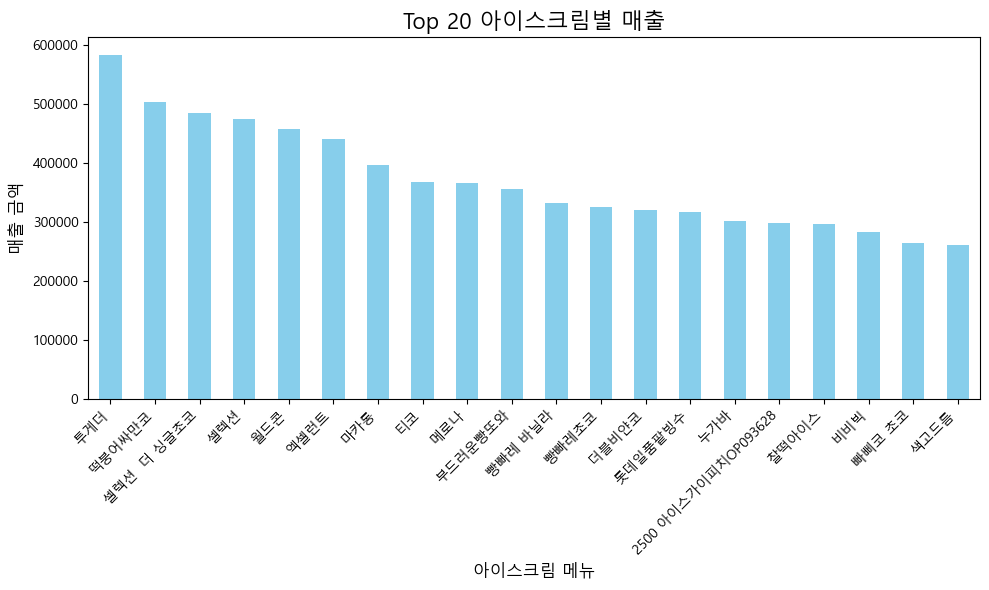

In [269]:
# 시각화 : 막대그래프

# 상위 20개의 아이스크림 매출 추출
top_20_revenue = revenue_by_icecream.head(20)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
top_20_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 20 아이스크림별 매출', fontsize=16)
plt.xlabel('아이스크림 메뉴', fontsize=12)
plt.ylabel('매출 금액', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [270]:
# 요일별 매출

# 요일 추출
expanded_icecream['요일'] = expanded_icecream['영업일자'].dt.day_name()

# 요일별 매출 계산
revenue_by_day = expanded_icecream.groupby('요일')['판매가격'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 매출이 높은 순으로 정렬
revenue_by_day_sorted = revenue_by_day.sort_values(ascending=False)
revenue_by_day_sorted

요일
Sunday       7684700
Saturday     7627800
Friday       7186600
Wednesday    6410500
Thursday     6252200
Tuesday      5757400
Monday       5478000
Name: 판매가격, dtype: int64

In [271]:
# 주중과 주말 구분
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']

# 주중, 주말 매출 평균 계산
weekday_revenue = revenue_by_day[revenue_by_day.index.isin(weekday)].mean()
weekend_revenue = revenue_by_day[revenue_by_day.index.isin(weekend)].mean()

# 출력
print(f"주중 평균 매출: {weekday_revenue:.2f}")
print(f"주말 평균 매출: {weekend_revenue:.2f}")

주중 평균 매출: 6216940.00
주말 평균 매출: 7656250.00


- 요일별 매출은 직관과 일치. 주중보다 주말의 매출이 약 1.23배 높음
- 주말에 가까워질 수록 매출이 높은 경향이 있음

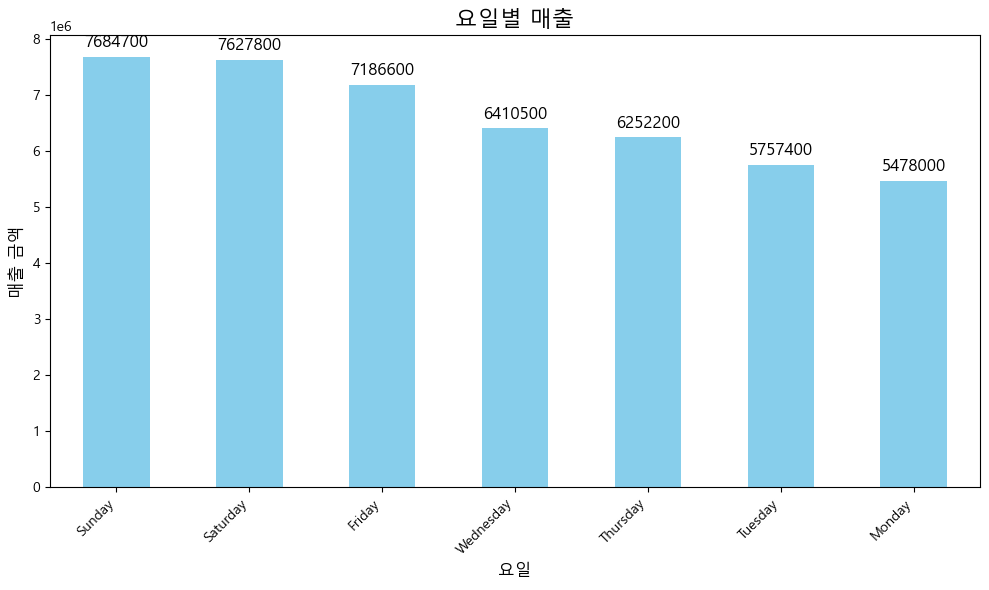

In [272]:
# 요일별 매출 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
ax = revenue_by_day_sorted.plot(kind='bar', color='skyblue')

# 막대 위에 수치 표시
for i, v in enumerate(revenue_by_day_sorted):
    ax.text(i, v + 100000, f'{v:.0f}', ha='center', va='bottom', fontsize=12)

# 제목 및 레이블 설정
plt.title('요일별 매출', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('매출 금액', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [273]:
# 월별 매출

# '승인일자'에서 월 정보만 추출하여 문자열로 변환
expanded_icecream['월'] = expanded_icecream['승인일자'].dt.strftime('%Y-%m')

# 월별 매출 계산
revenue_by_month = expanded_icecream.groupby('월')['판매가격'].sum()
print(revenue_by_month)

월
2021-02    1142900
2021-03    2558800
2021-04    2739800
2021-05    3516100
2021-06    3701700
2021-07    4616700
2021-08    3656500
2021-09    3081600
2021-10    2300100
2021-11    1801100
2021-12    1723300
2022-01    1954800
2022-02    1614100
2022-03    2539400
2022-04    2685400
2022-05    2877800
2022-06    3306500
2022-07     580600
Name: 판매가격, dtype: int64


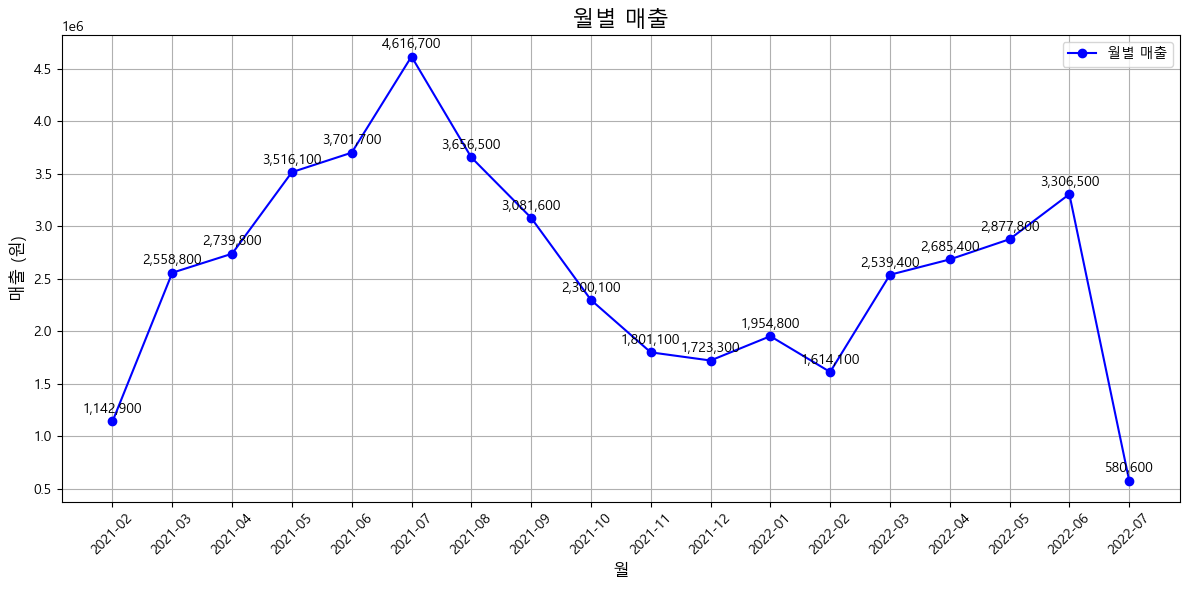

In [274]:
# 월별 매출 시각화 (선그래프)
plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month.index.astype(str), revenue_by_month.values, marker='o', color='b', label='월별 매출')

# 그래프 꾸미기
plt.title('월별 매출', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('매출 (원)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 수치 표시
for i, v in enumerate(revenue_by_month.values):
    plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.show()


- 대체로 겨울보다 여름에 매출이 높다. 직관과 일치하는 결과
- 2022년 3월 전체적인 판매가 인상이 있었다. 
- 2022년 7월은 폐업으로 인한 정리세일을 진행했다.

In [275]:
print(expanded_icecream['승인시간'].head(10))  # 데이터 샘플 확인
print(expanded_icecream['승인시간'].dtype)     # 데이터 유형 확인


0    11:04:42
1    11:04:42
2    11:04:42
3    11:04:42
4    11:04:42
5    11:04:42
6    11:04:42
7    11:04:42
8    11:20:37
9    11:20:37
Name: 승인시간, dtype: object
object


In [276]:
expanded_icecream['승인시간'] = pd.to_datetime(expanded_icecream['승인시간'], format='%H:%M:%S', errors='coerce')
expanded_icecream['승인시간']

0       1900-01-01 11:04:42
1       1900-01-01 11:04:42
2       1900-01-01 11:04:42
3       1900-01-01 11:04:42
4       1900-01-01 11:04:42
                ...        
60990   1900-01-01 17:36:29
60991   1900-01-01 17:36:29
60992   1900-01-01 17:36:29
60993   1900-01-01 18:04:48
60994   1900-01-01 17:51:59
Name: 승인시간, Length: 60995, dtype: datetime64[ns]

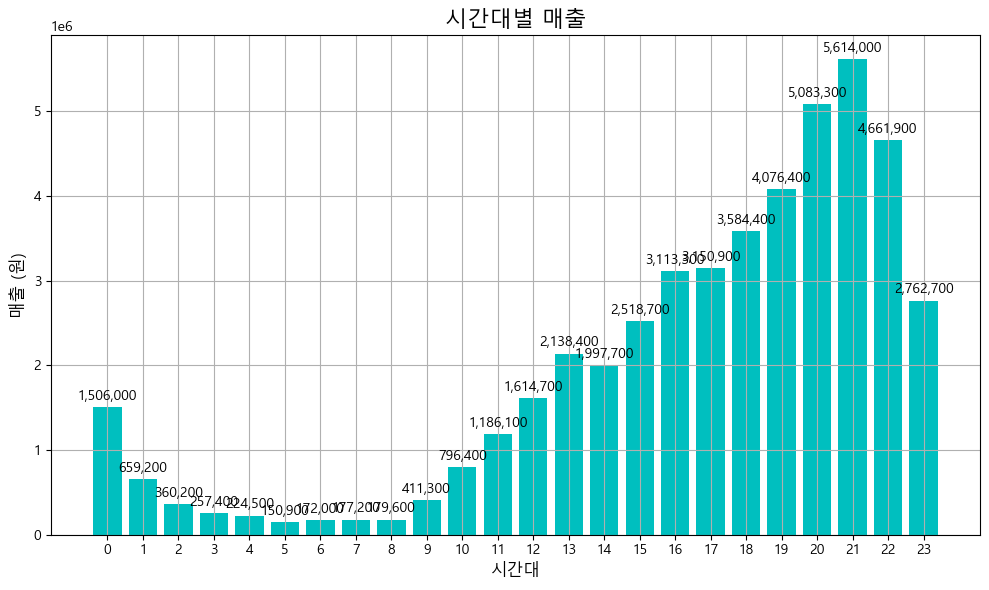

In [277]:
# 시간대별 매출

# 1. 시간만 추출
expanded_icecream['시간대'] = expanded_icecream['승인시간'].dt.hour

# 2. 시간대별 매출 계산
revenue_by_hour = expanded_icecream.groupby('시간대')['판매가격'].sum()

# 3. 시간대별 매출 시각화 (막대그래프)
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_hour.index, revenue_by_hour.values, color='c')

# 그래프 꾸미기
plt.title('시간대별 매출', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('매출 (원)', fontsize=12)
plt.xticks(range(24))  # 0~23 시간대 표시
plt.grid(True)
plt.tight_layout()

# 수치 표시
for i, v in enumerate(revenue_by_hour.values):
    plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.show()

- 아이스크림 가게가 아파트 단지와 주택가 근처에 위치하고 있어 고객들이 하루 일과를 마치고 가게에 들러 많은 거래가 이루어질 것이라 생각했는데 예상과는 달리 21시에 가장 많은 매출을 보임(일반적인 퇴근시간이라고 보기에 다소 늦은 시간)
- 아이스크림 가게 주변에 초등학교가 위치하고 있어서 13시-14시 매출이 높을 줄 알았지만 생각보다 높지 않은 매출

In [278]:
# 데이터를 CSV 파일로 저장
expanded_icecream.to_csv('C:/Users/09048/2025project/analysis-icecream-ml/data/expanded_icecream.csv', index=False, encoding='utf-8-sig')  # index=False로 인덱스 제외

